读取数据

In [404]:
import pandas as pd
df = pd.read_csv('stock_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      1760 non-null   object 
 1   股票代码    1760 non-null   int64  
 2   开盘      1760 non-null   float64
 3   收盘      1760 non-null   float64
 4   最高      1760 non-null   float64
 5   最低      1760 non-null   float64
 6   成交量     1760 non-null   int64  
 7   成交额     1760 non-null   float64
 8   振幅      1760 non-null   float64
 9   涨跌幅     1760 non-null   float64
 10  涨跌额     1760 non-null   float64
 11  换手率     1760 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 165.1+ KB


把日期转换成时间格式并设置成索引，选取部分变量

In [405]:
columns = ['日期','开盘', '最高', '收盘', '最低', '成交量']
df['日期']=pd.to_datetime(df['日期'])
df = df[columns]
df.set_index('日期', inplace=True)

绘制一段时间内的K线图

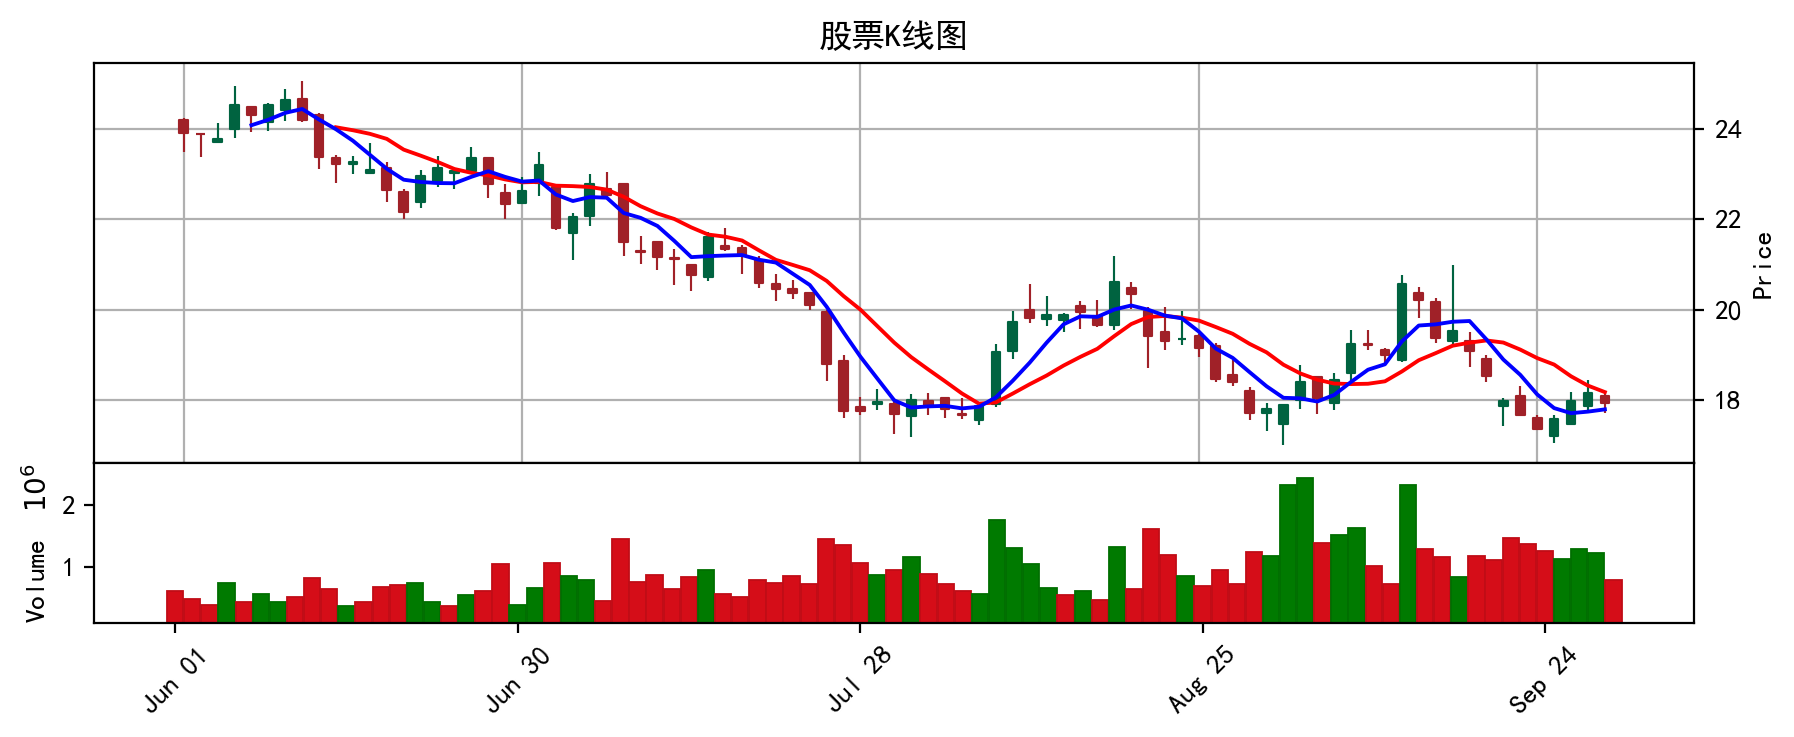

In [406]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

data = df.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})

def kline(data,start_time,end_time):#绘制K线图
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 处理数据
    data = data[start_time:end_time]

    # 添加图表
    global fig
    fig = plt.figure(figsize=(8, 4),dpi=200)
    ax = fig.add_axes([0,0.2,1,0.5])
    ax2 = fig.add_axes([0,0,1,0.2])
    # 绘制K线图
    mpf.plot(data,type='candle', style='charles', ax=ax, volume=ax2,mav=(10,5),mavcolors=('r','b'))

    ax.set_title("股票K线图")
    ax.grid(True)
    plt.show()

start_time = '2021-06-01'
end_time = '2021-09-30'
kline(data,start_time,end_time)

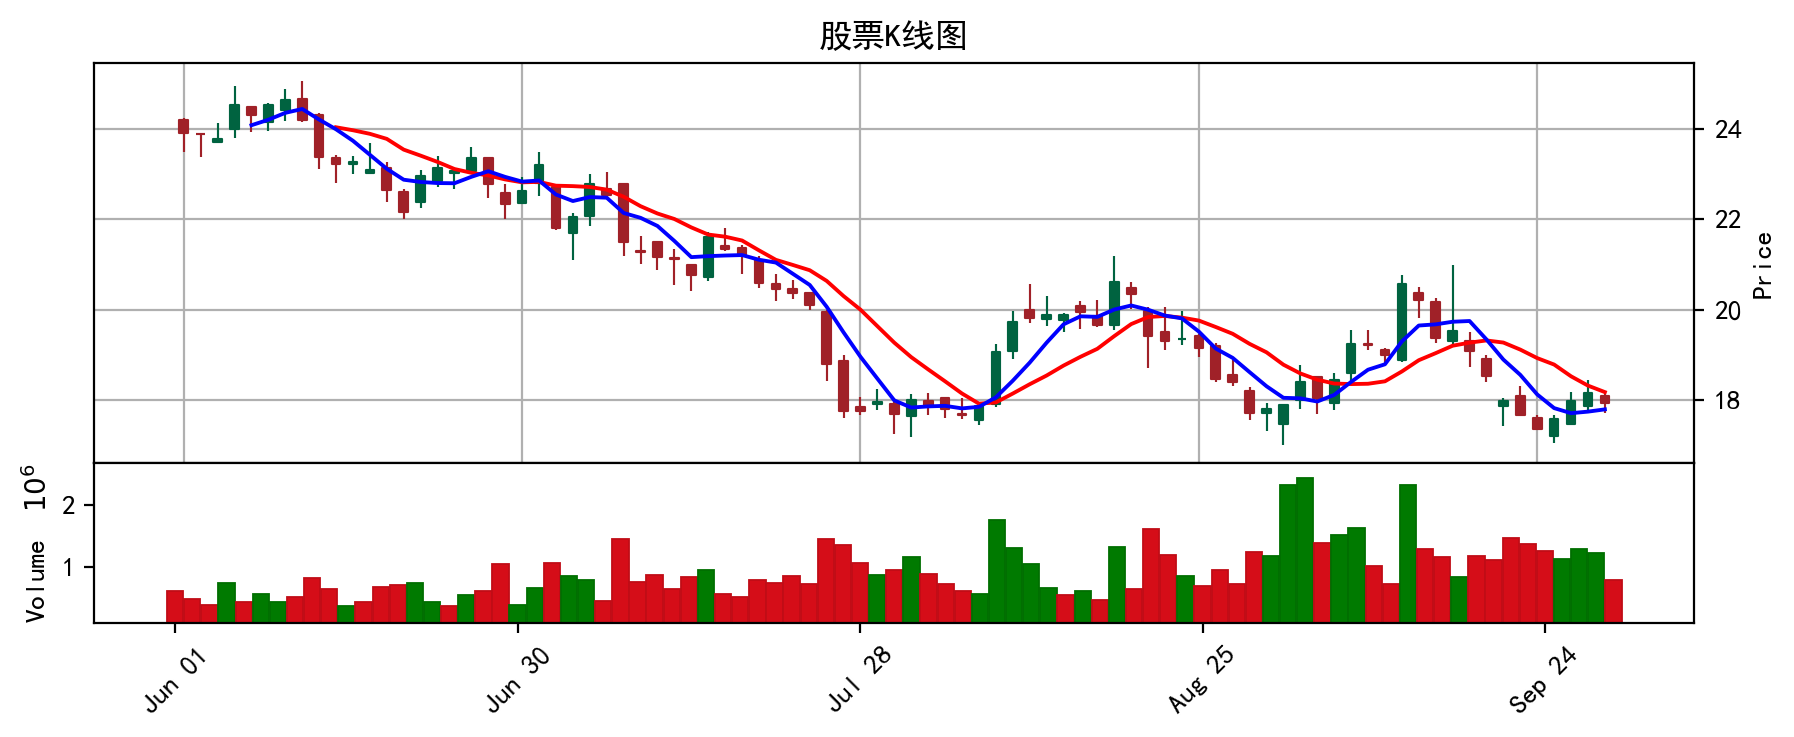

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

data = df.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})

def kline(data,start_time,end_time):#绘制K线图
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 处理数据
    data = data[start_time:end_time]

    # 添加图表
    global fig
    fig = plt.figure(figsize=(8, 4),dpi=200)
    ax = fig.add_axes([0,0.2,1,0.5])
    ax2 = fig.add_axes([0,0,1,0.2])
    # 绘制K线图
    mpf.plot(data,type='candle', style='charles', ax=ax, volume=ax2,mav=(10,5),mavcolors=('r','b'))

    ax.set_title("股票K线图")
    ax.grid(True)
    plt.show()

start_time = '2021-06-01'
end_time = '2021-09-30'
kline(data,start_time,end_time)

异常值处理和归一化并划分数据

In [407]:
for col in columns:
    if col == '日期':
        continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

    print(df[col][outlier_condition])

Series([], Name: 开盘, dtype: float64)
Series([], Name: 最高, dtype: float64)
Series([], Name: 收盘, dtype: float64)
Series([], Name: 最低, dtype: float64)
Series([], Name: 成交量, dtype: int64)


In [408]:
df.interpolate(method='time')

,开盘,最高,收盘,最低,成交量
日期,,,,,
2017-03-01,9.49,9.55,9.49,9.47,346994
2017-03-02,9.51,9.54,9.43,9.42,403629
2017-03-03,9.41,9.43,9.40,9.36,342655
2017-03-06,9.40,9.46,9.45,9.39,404511
2017-03-07,9.44,9.46,9.45,9.40,294673
...,...,...,...,...,...
2024-05-22,11.56,11.74,11.56,11.46,2115531
2024-05-23,11.53,11.59,11.40,11.37,1841623
2024-05-24,11.37,11.49,11.31,11.30,1398276


In [409]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalers = {}

for col in df.columns:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    scalers[col] = scaler
print(df)

                  开盘        最高        收盘        最低       成交量
日期                                                          
2017-03-01  0.075733  0.073927  0.076349  0.086221  0.059304
2017-03-02  0.077362  0.073132  0.071369  0.081995  0.087389
2017-03-03  0.069218  0.064388  0.068880  0.076923  0.057153
2017-03-06  0.068404  0.066773  0.073029  0.079459  0.087826
2017-03-07  0.071661  0.066773  0.073029  0.080304  0.033359
...              ...       ...       ...       ...       ...
2024-05-22  0.244300  0.248013  0.248133  0.254438  0.936297
2024-05-23  0.241857  0.236089  0.234855  0.246830  0.800470
2024-05-24  0.228827  0.228140  0.227386  0.240913  0.580620
2024-05-27  0.223941  0.231320  0.243983  0.241758  0.608432
2024-05-28  0.239414  0.235294  0.234855  0.245985  0.484442

[1560 rows x 5 columns]


划分数据集

In [410]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [411]:
import numpy as np
def data_split(dataset, look_back=100):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        y.append(dataset[i + look_back, :])
    return np.array(X), np.array(y)

X_train, y_train = data_split(train.values)
X_test, y_test = data_split(test.values)

定义神经网络

In [412]:
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Dropout, Input
from keras.optimizers import Nadam

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(
        filters=64,
        kernel_size=3,
        activation="relu"
    ),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(5)
])

model.compile(optimizer=Nadam(learning_rate=0.001), loss="mse")

开始训练模型

In [413]:
from keras.callbacks import EarlyStopping
#早停策略
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks=[es]
)
model.save('股票数据预测.h5')

Epoch 1/20


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0484 - val_loss: 0.0188
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0193 - val_loss: 0.0164
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0169 - val_loss: 0.0144
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0153 - val_loss: 0.0103
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0135 - val_loss: 0.0094
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0132 - val_loss: 0.0093
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121 - val_loss: 0.0089
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0128 - val_loss: 0.0086
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0121 - val_loss: 0.0093
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0124 - val_loss: 0.0089
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - val_loss: 0.0082
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0119 - val_l

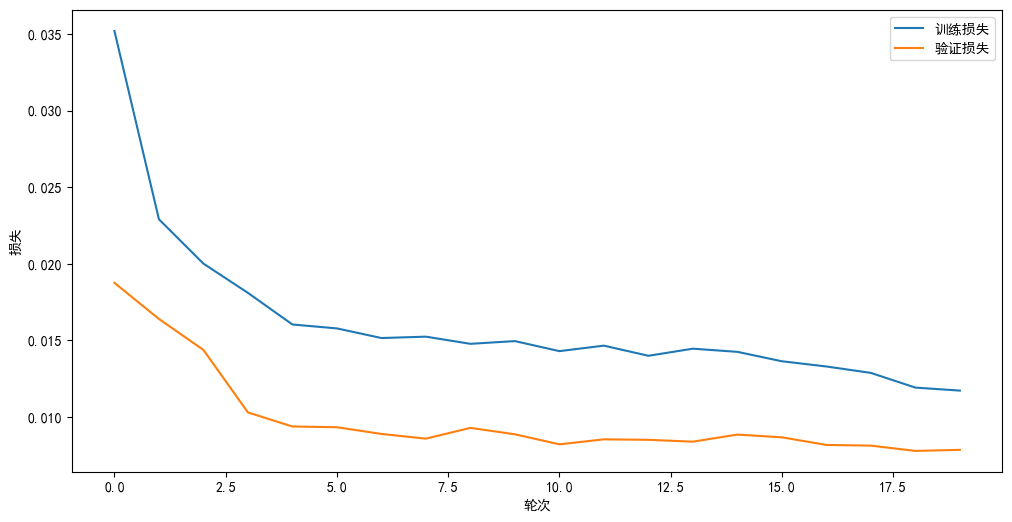

In [414]:
# 绘制训练损失和验证损失
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('轮次')
plt.ylabel('损失')
plt.legend()
plt.show()

进行反归一化

               开盘     最高     收盘     最低        成交量
日期                                               
2017-03-01   9.49   9.55   9.49   9.47   346994.0
2017-03-02   9.51   9.54   9.43   9.42   403629.0
2017-03-03   9.41   9.43   9.40   9.36   342655.0
2017-03-06   9.40   9.46   9.45   9.39   404511.0
2017-03-07   9.44   9.46   9.45   9.40   294673.0
...           ...    ...    ...    ...        ...
2024-05-22  11.56  11.74  11.56  11.46  2115531.0
2024-05-23  11.53  11.59  11.40  11.37  1841623.0
2024-05-24  11.37  11.49  11.31  11.30  1398276.0
2024-05-27  11.31  11.53  11.51  11.31  1454361.0
2024-05-28  11.50  11.58  11.40  11.36  1204323.0

[1560 rows x 5 columns]


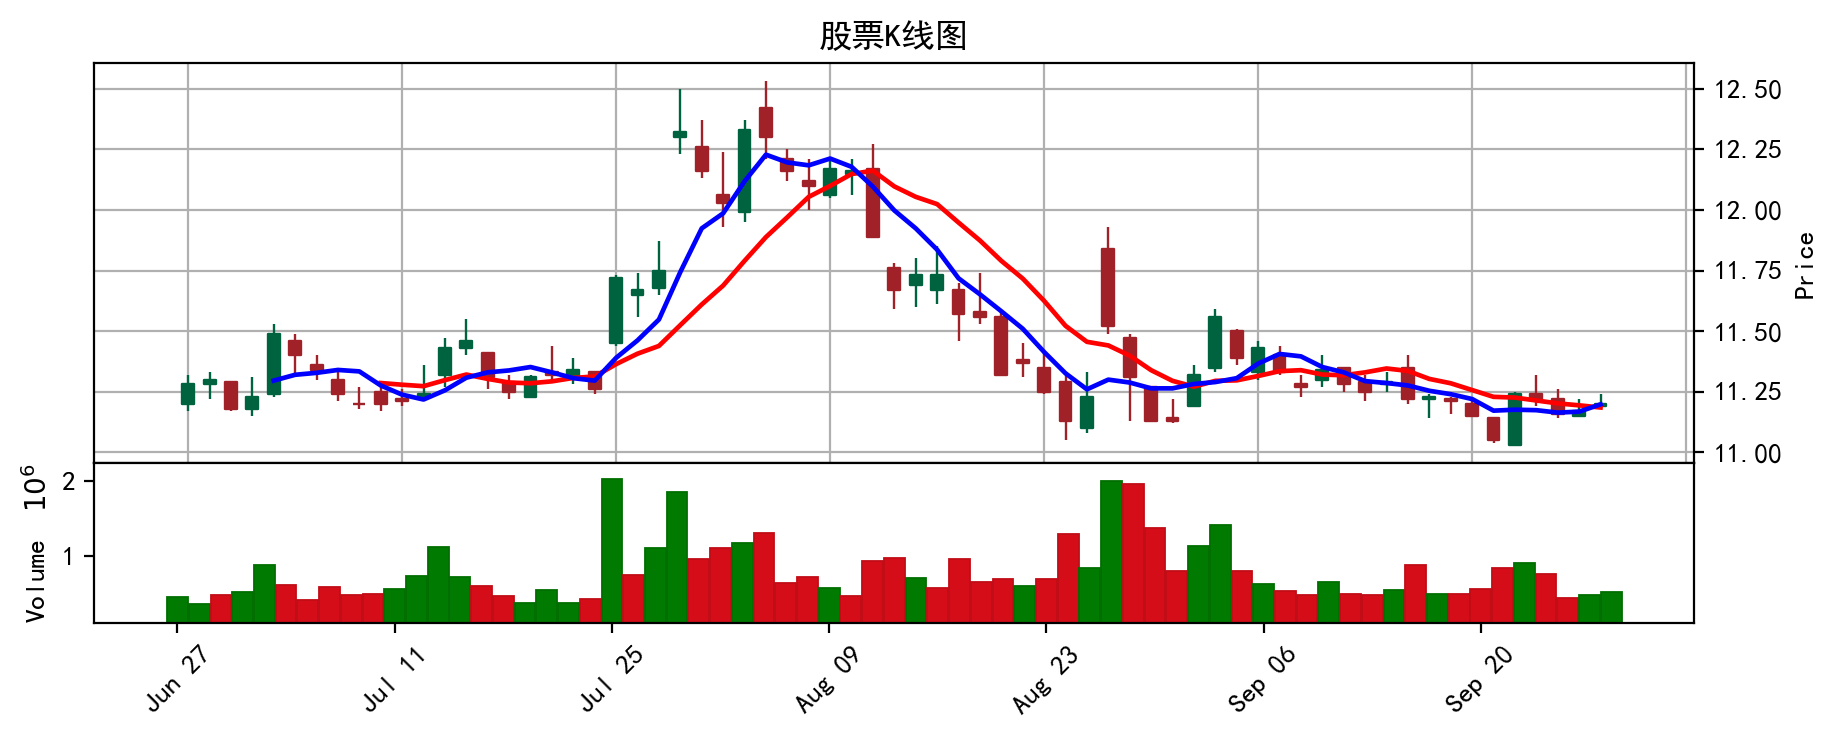

open      2.505119e-16
high      2.322928e-16
close     2.311541e-16
low       2.778404e-16
volume    2.007418e-11
dtype: float64


In [421]:
def inverse_scaling(df, scalers):
    #归一化数据逆缩放
    df_inverse = pd.DataFrame()
    for col in df.columns:
        df_inverse[col] = scalers[col].inverse_transform(df[col].values.reshape(-1, 1)).flatten()
    return df_inverse

df_inverse = inverse_scaling(df, scalers)
df_inverse['日期'] = df.index
df_inverse.set_index('日期', inplace=True)
print(df_inverse)#原数据
df_inverse = df_inverse.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})

前面的步骤：
1.读取数据
2.进行数据预处理，包括异常值、缺失值处理和归一化
3.分割数据成训练集和测试集
4.把数据的60天的时间步放到了X_train和X_test
5.定义模型的参数和神经网络
6.使用包含时间步的数据进行模型训练

希望使用的模型步骤
模型接受数据类型：
(样本量，时间步长为60的数据，维度为5)
通过包含前六十天的数据预测明天的数据
把明天的数据加到原数据，通过包含前五十九天的数据和明天的数据来预测后天的数据

In [416]:
# 选择 X_train 的最后一部分作为输入数据
last_part = X_train[-1]
last_part = np.expand_dims(last_part, axis=0)

def predict_data(last_part, days=90):
    #已知数据(样本数，时间步长，特征数)
    future = []
    for _ in range(days):
        next_day = model.predict(last_part,verbose=0)
        #格式是(1, 5)，一天的五个变量
        future.append(next_day)
        #所以把该变量和last_part合并，并删除last_part的第一个时间步长
        #lastpart为(样本数，时间步长，特征数)
        #next_day为(样本数，特征数)
        next_day = np.expand_dims(next_day, axis=1)  # 增加一个新的维度
        last_part = np.concatenate((last_part[:, 1:, :], next_day), axis=1) 
    future = np.squeeze(future, axis=1)
    future_df = pd.DataFrame(future, columns=['开盘', '最高', '收盘', '最低', '成交量'])
    return future_df

days = y_test.shape[0]
future = predict_data(last_part, days=days)

future=inverse_scaling(future,scalers)
future['日期'] = df.index[-days:]
future.set_index('日期', inplace=True)
print(future)

                   开盘         最高         收盘         最低           成交量
日期                                                                  
2023-06-27  14.708179  14.818071  14.657127  14.409167  1.034477e+06
2023-06-28  14.748886  14.853595  14.691719  14.424919  1.027823e+06
2023-06-29  14.730412  14.826488  14.659600  14.403152  1.026356e+06
2023-06-30  14.714089  14.798326  14.630644  14.387271  1.029650e+06
2023-07-03  14.696130  14.774661  14.605604  14.370478  1.032248e+06
...               ...        ...        ...        ...           ...
2024-05-22  14.177680  14.207726  14.040364  13.823895  1.079042e+06
2024-05-23  14.177647  14.207690  14.040327  13.823859  1.079046e+06
2024-05-24  14.177616  14.207654  14.040291  13.823824  1.079049e+06
2024-05-27  14.177584  14.207619  14.040257  13.823789  1.079053e+06
2024-05-28  14.177554  14.207586  14.040222  13.823755  1.079057e+06

[211 rows x 5 columns]


future为预测数据，将其和X_test进行可视化分析

2023-06-27 2023-09-30


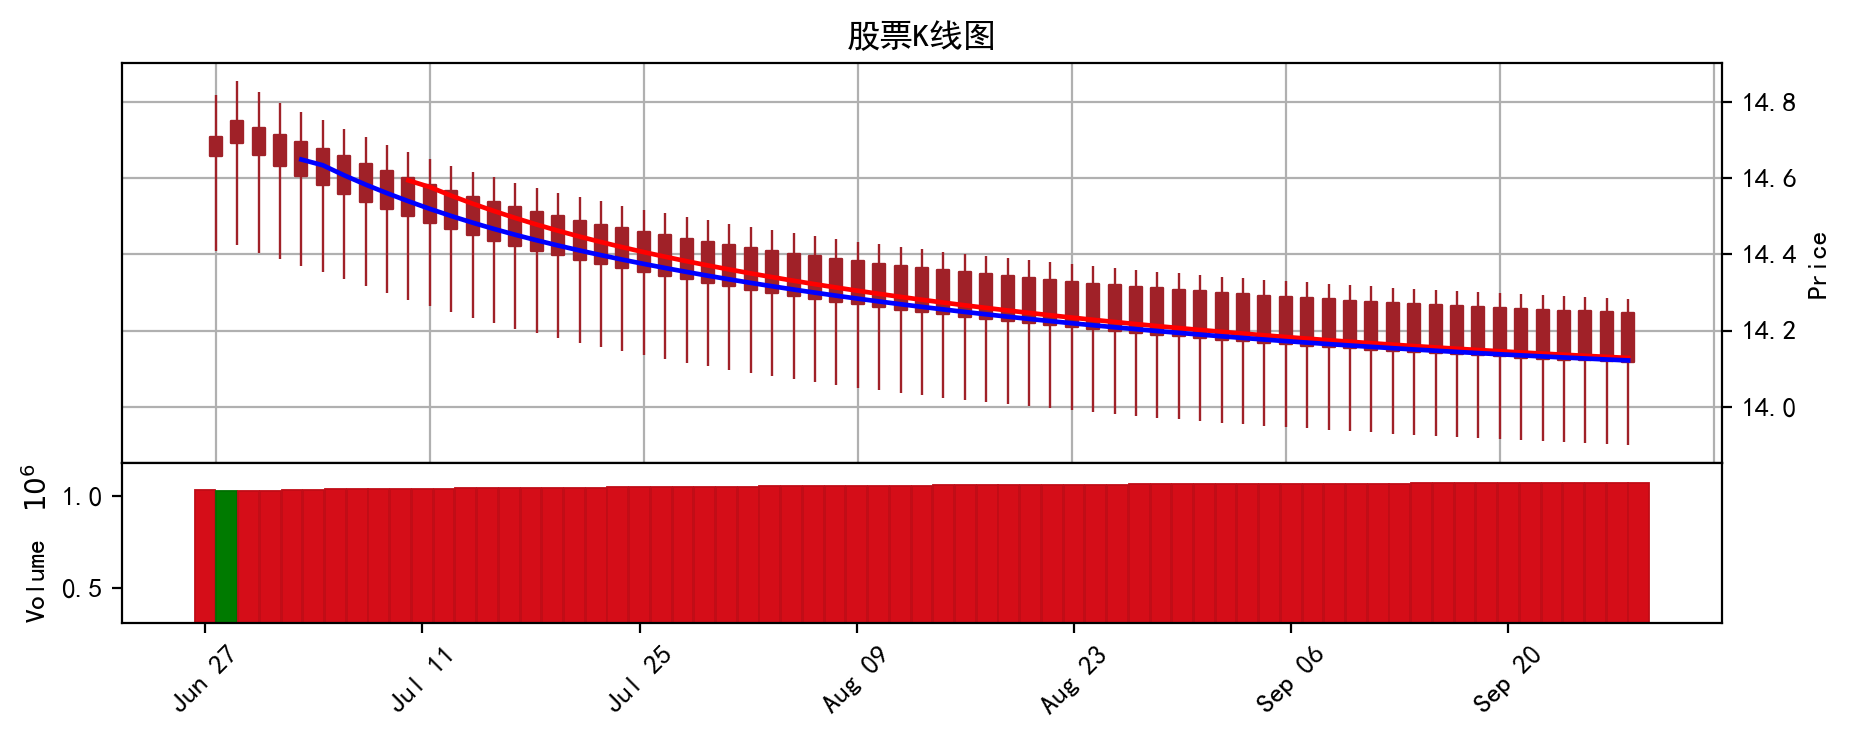

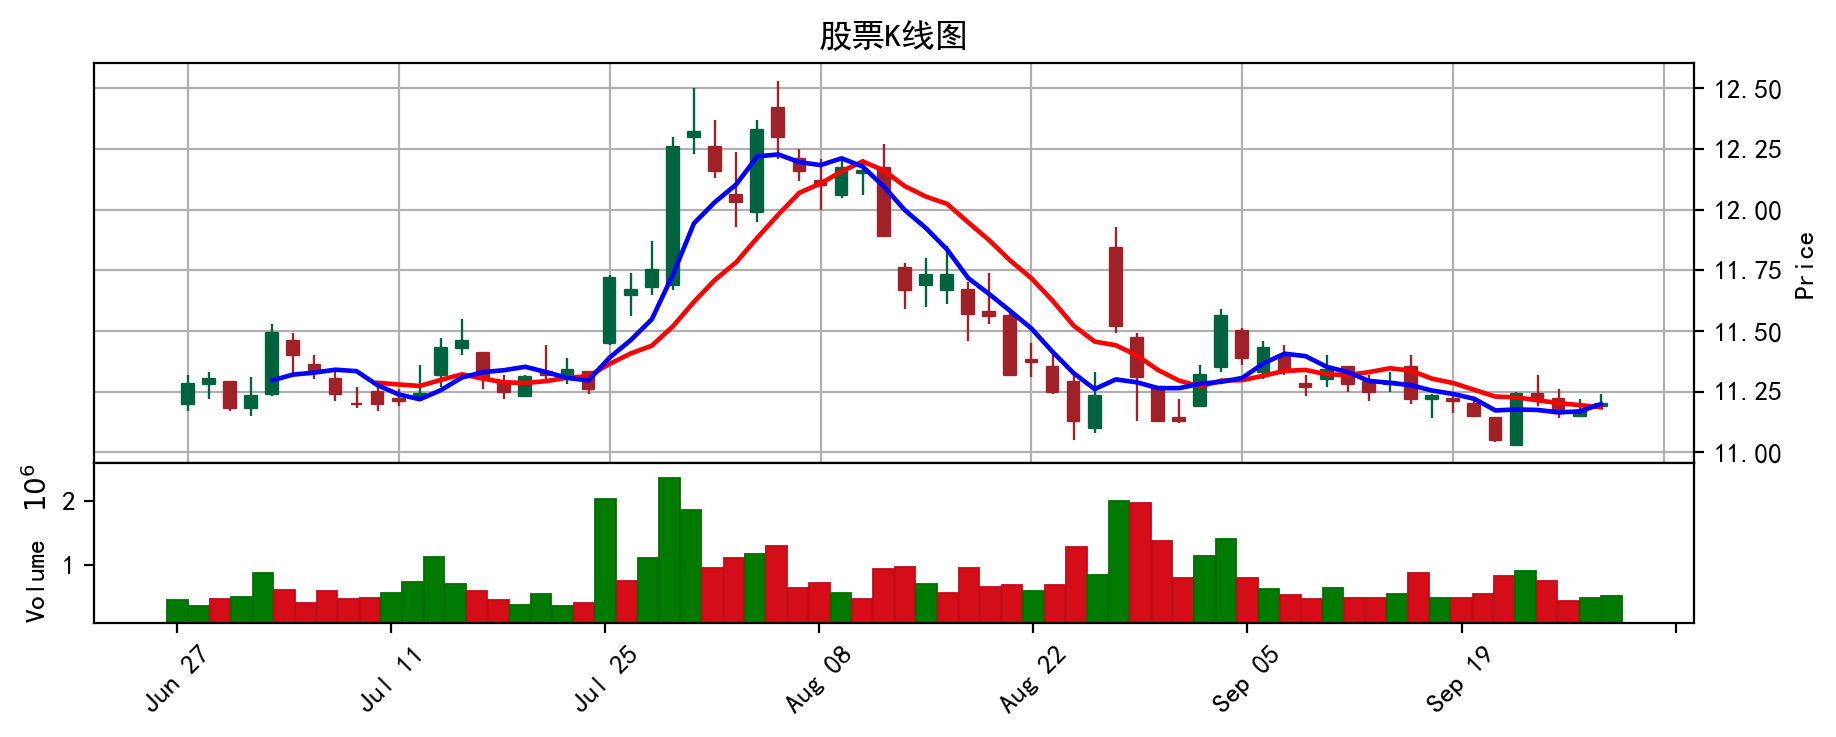

                open      high     close       low       volume
日期                                                             
2023-06-27  3.508179  3.498071  3.377127  3.239167  572774.5625
2023-06-28  3.468886  3.523595  3.391719  3.204919  662427.3125
2023-06-29  3.440412  3.536488  3.479600  3.233152  540450.3125
2023-06-30  3.534089  3.488326  3.400644  3.237271  510596.8750
2023-07-03  3.456130  3.244661  3.115604  3.140478  147157.4375
...              ...       ...       ...       ...          ...
2023-09-22  3.225055  3.043041  2.887095  2.879908  158449.1250
2023-09-25  3.012757  2.970507  2.904522  2.717354  308992.8750
2023-09-26  3.030527  3.028048  2.962025  2.764878  625486.5000
2023-09-27  3.098364  3.065660  2.949603  2.752474  580410.5000
2023-09-28  3.056265  3.043346  2.917251  2.720144  550272.0000

[68 rows x 5 columns]
                open      high     close       low       volume
日期                                                             
2023-06-27  3.508

In [427]:
start_time = '2023-06-27'
end_time = '2023-09-30'

print(start_time,end_time)
future=future.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})
kline(future,start_time,end_time)
kline(data,start_time,end_time)

# 计算两个 DataFrame 的差值
future = future[start_time:end_time]
data = data[start_time:end_time]
diff = future - data

# 计算每个数据点的误差
error = diff.abs()

# 计算平均误差
mean_error = error.var()
print(error)

print(mean_error)